In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('dataset/final_data.csv')

In [3]:
df.head(5)

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [4]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'aspiration', 'num-of-doors',
       'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length',
       'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders',
       'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio',
       'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price',
       'city-L/100km', 'horsepower-binned', 'diesel', 'gas'],
      dtype='object')

In [5]:
X = df[['length','width','curb-weight','engine-size','horsepower','city-mpg','highway-mpg','wheel-base','bore']].copy()
Y = df[['price']].copy()

In [6]:
X

,length,width,curb-weight,engine-size,horsepower,city-mpg,highway-mpg,wheel-base,bore
0,0.811148,0.890278,2548,130,111.0,21,27,88.6,3.47
1,0.811148,0.890278,2548,130,111.0,21,27,88.6,3.47
2,0.822681,0.909722,2823,152,154.0,19,26,94.5,2.68
3,0.848630,0.919444,2337,109,102.0,24,30,99.8,3.19
4,0.848630,0.922222,2824,136,115.0,18,22,99.4,3.19
...,...,...,...,...,...,...,...,...,...
196,0.907256,0.956944,2952,141,114.0,23,28,109.1,3.78
197,0.907256,0.955556,3049,141,160.0,19,25,109.1,3.78
198,0.907256,0.956944,3012,173,134.0,18,23,109.1,3.58
199,0.907256,0.956944,3217,145,106.0,26,27,109.1,3.01


In [7]:
Y

,price
0,13495.0
1,16500.0
2,16500.0
3,13950.0
4,17450.0
...,...
196,16845.0
197,19045.0
198,21485.0
199,22470.0


In [8]:
feature = X.values

In [9]:
value = Y.values

In [10]:
from sklearn.model_selection import  train_test_split
feature_train,feature_test,value_train,value_test=train_test_split(feature,value,test_size=0.2,random_state=0)

 # Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler
feature_train=sc.fit_transform(feature_train)
feature_test=sc.fit_transform(feature_test)

In [11]:
from sklearn.linear_model import LinearRegression
# create an object
ml=LinearRegression()
ml.fit(feature_train,value_train)

LinearRegression()

In [12]:
value_pred = ml.predict(feature_test)
print(value_pred)

[[ 5844.78826709]
 [11348.76667238]
 [20251.35191747]
 [21406.74779824]
 [20982.97703476]
 [ 9879.57644106]
 [14505.61640274]
 [ 6268.36622588]
 [17371.50852175]
 [ 7133.70247958]
 [11507.71500216]
 [20541.38134988]
 [ 7886.8953474 ]
 [ 8265.97639025]
 [17609.8386963 ]
 [18850.71526732]
 [ 7187.296721  ]
 [15162.619681  ]
 [10059.0243429 ]
 [ 6519.28263493]
 [ 8831.91486004]
 [11378.28561983]
 [34430.44666013]
 [ 7120.2429999 ]
 [10714.41422928]
 [20371.31095412]
 [ 9624.47084742]
 [ 9504.92699123]
 [16466.32920539]
 [34430.44666013]
 [28782.10479945]
 [ 9988.00408999]
 [ 7152.48315378]
 [20463.93991216]
 [ 8683.58535865]
 [11878.49692468]
 [12873.01744172]
 [16002.62752504]
 [10954.88595136]
 [17472.32821968]
 [ 5561.23545132]]


In [15]:
value=[[0.811148,0.890278,2548,130,111.0,21,27,88.6,3.47]]

ml.predict(value)

array([[11136.98548867]])

In [18]:
from sklearn.metrics import r2_score
r2_score(value_test,value_pred)

0.7526252480045523

Text(0, 0.5, 'Predict')

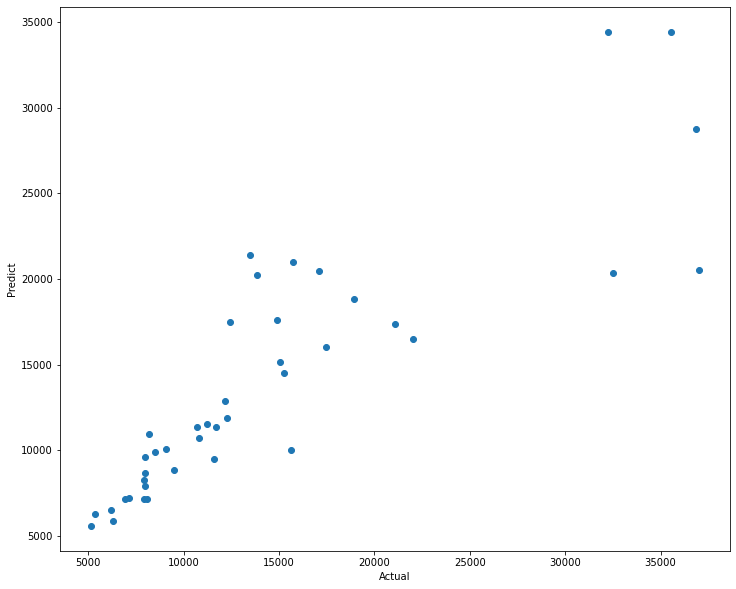

In [19]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,10))
plt.scatter(value_test,value_pred)
plt.xlabel('Actual')
plt.ylabel('Predict')

future_value = pd.DataFrame({'Actual value':value_test, 'Predicted value':value_pred, 'Difference': value_test-value_pred})
future_value[0:20]

In [17]:
import pickle
pickle.dump(LinearRegression,open("model.pkl", "wb"))